# Newton Integration Root Finding

In [7]:
import numpy as np
from scipy.optimize import newton
from polyrand import rootfinder as rf
import matplotlib.pyplot as plt
import importlib
from matplotlib import animation,rc
from IPython.display import HTML
%matplotlib inline

In [8]:
importlib.reload(rf)

<module 'polyrand.rootfinder' from '/home/derek/repos/polyrand/polyrand/rootfinder.py'>

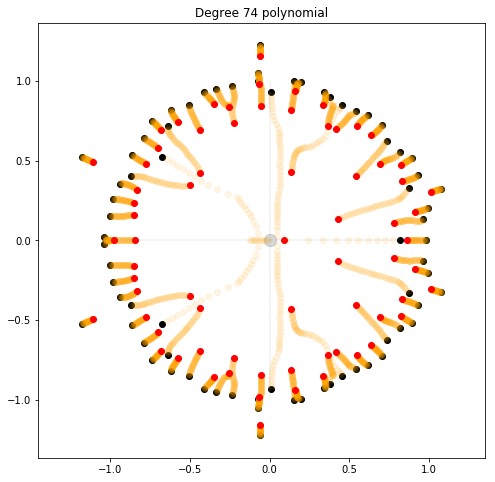

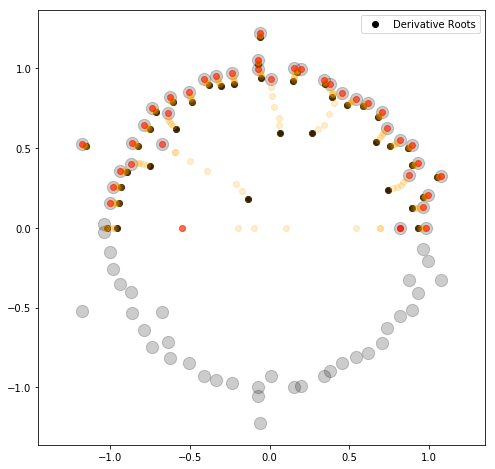

In [9]:
# test case
np.random.seed(1)
coeffs = np.random.randn(75)
coeffs[-1] = 1.

rf.timelapse(coeffs,0,4,n_frames=43)
rts = rf.newton_integration(coeffs,1.5,n=6,show=True)

In [10]:
#rf.animate_roots(coeffs,0,1.5)

[-28.75    50.875  -30.       9.0625  -1.25     0.0625]


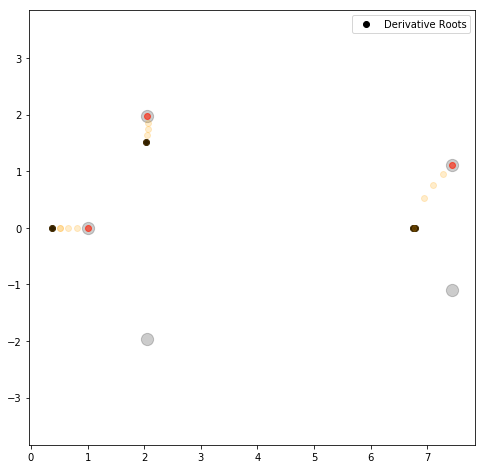

array([ 1.00000000+0.j        ,  2.05896143+1.97221691j,
        7.44103857+1.10396452j])

In [11]:
#print(rts)
coeffs = np.polynomial.chebyshev.chebfromroots(np.arange(5))
print(coeffs)
rf.newton_integration(coeffs,.5074,n=4,show=True)

**Complexity Analysis**

computational complexity

$ c = count(k-a>0)$

gamma eval is constant

QR is $4/3 c^3$

$ c = count(k-a>0)$



Currently breaks when the polynomial reaches degree 74 for 2 derivatives and 17 steps.

It seems to get more fragile as more derivatives are taken.

Try seeing if it is more stable with coefficients from different distributions. You know that roots from std normal coeffs are not as 'stable' or consistent or nice in the fractional sense as other choices of coeffs.

Thoughts:

+ Theorem stating how roots combine on the real axis. This makes it easier to newton integrate.
+ Theorem: The initial guess for the roots of a function can be brought within the Newton-Kantorovich bound via the roots of a fractional derivative.
+ If a polynomial has all real roots, the roots of the fractional derivatives have a tendency to jump so NIRF doesn't converge.

## Q: How does fractional derivative affect $dist(x_1,x_0)$?

In [12]:
# random polynomial
coeffs = np.random.randn(7)
coeffs[-1] = 1.

p = np.polynomial.polynomial.Polynomial(coeffs)

print(p.roots())


[-0.91026642+0.j         -0.55474945-1.01652784j -0.55474945+1.01652784j
  0.63528924-1.14084178j  0.63528924+1.14084178j  0.97151500+0.j        ]


In [23]:
for a in np.linspace(0,1,11):
    q = np.polynomial.polynomial.Polynomial(rf.fracdiff(coeffs,a))
    x0 = q.roots()[1]
    
    print(a,'\t\t',abs(p(x0)/p.deriv()(x0)))

0.0 		 7.40013939806e-16
0.1 		 0.0501089050132
0.2 		 0.114065969501
0.3 		 0.198298390726
0.4 		 0.313612698767
0.5 		 0.47960308441
0.6 		 0.735713640729
0.7 		 1.17462403041
0.8 		 2.07700863977
0.9 		 4.86555686219
1.0 		 9.39264315131e+14
